In [1]:
# import keras
import os
import theano
# Switch backen to theano
os.environ['KERAS_BACKEND'] = 'theano'
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN"
from keras import models
from keras import layers
import pandas as pd

Using Theano backend.


In [2]:
df_train = pd.read_csv("data/workshop_train.csv")

In [3]:
df_train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,10633_1,0,I watched this video at a friend's house. I'm ...
2,319_1,0,"A friend of mine bought this film for £1, and ..."
3,6811_10,1,Although I generally do not like remakes belie...
4,7369_1,0,"I had a feeling that after \Submerged\"", this ..."


In [4]:
from bs4 import BeautifulSoup 
# The package comes built-in with Python
import re
# http://www.nltk.org/install.html
import nltk 

In [5]:
from nltk.corpus import stopwords # Import the stop word list
stops = set(stopwords.words("english"))

In [6]:
# Pre-processing step
def text_to_words(raw_text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_text).get_text() 

    # 2. Remove non-letters
    # Find anything that is NOT a lowercase letter (a-z) or an upper case letter (A-Z), and replace it with a space
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    # stops = set(stopwords.words("english"))
    
    # There are many other things we could do to the data
    # For example, Porter Stemming and Lemmatizing (both available in NLTK) 
    # would allow us to treat "messages", "message", and "messaging" as the same word
    # which could certainly be useful.
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    clear_text = " ".join(meaningful_words)
    return clear_text
    #validate_text_sentiment["Message"][i] = clear_text 
    #print i
    #return( " ".join( meaningful_words ))  

In [7]:
# Use the apply function in pandas to apply the function
# axis = 1 specifier means that the application is done at a row than a column level
df_train['cleaned_text'] = df_train.apply (lambda row: text_to_words(row.review), axis=1)

/Users/ayush/anaconda2/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/ayush/anaconda2/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [9]:
from sklearn.model_selection import train_test_split
df_train, df_validate = train_test_split(df_train, test_size=0.2)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, 
                             max_features = 5000) 
train_data_features = vectorizer.fit_transform(df_train['cleaned_text'].values.astype('U'))
train_data_features = train_data_features.toarray()

In [11]:
import numpy as np

In [12]:
train_labels = df_train.sentiment.values
y_train = np.asarray(train_labels).astype('float32')

In [13]:
y_train

array([ 1.,  1.,  0., ...,  1.,  1.,  1.], dtype=float32)

In [14]:
validate_data_features = vectorizer.transform(df_validate['cleaned_text'].values.astype('U'))
validate_data_features = validate_data_features.toarray()

In [15]:
val_labels = df_validate.sentiment.values
y_val = np.asarray(val_labels).astype('float32')

In [16]:
# The core data structure of Keras is a model
# The simplest type of model is the Sequential model
# Sequential model a linear stack of layers

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   

In [66]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
history = model.fit(train_data_features,
                    y_train,
                    nb_epoch=20, batch_size=512, validation_split = 0.2)

/Users/ayush/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 8074 samples, validate on 2019 samples
Epoch 1/20
8074/8074 [==============================] - 0s 39us/step - loss: 1.1128e-07 - acc: 1.0000 - val_loss: 1.6619 - val_acc: 0.8435
Epoch 2/20
8074/8074 [==============================] - 0s 36us/step - loss: 1.1122e-07 - acc: 1.0000 - val_loss: 1.6622 - val_acc: 0.8435
Epoch 3/20
8074/8074 [==============================] - 0s 39us/step - loss: 1.1104e-07 - acc: 1.0000 - val_loss: 1.6623 - val_acc: 0.8435
Epoch 4/20
8074/8074 [==============================] - 0s 41us/step - loss: 1.1102e-07 - acc: 1.0000 - val_loss: 1.6627 - val_acc: 0.8435
Epoch 5/20
8074/8074 [==============================] - 0s 38us/step - loss: 1.1097e-07 - acc: 1.0000 - val_loss: 1.6631 - val_acc: 0.8435
Epoch 6/20
8074/8074 [==============================] - 0s 39us/step - loss: 1.1102e-07 - acc: 1.0000 - val_loss: 1.6634 - val_acc: 0.8435
Epoch 7/20
8074/8074 [==============================] - 0s 42us/step - loss: 1.1100e-07 - acc: 1.0000 - val_loss: 1.66

In [68]:
history_dict = history.history
print history_dict

{'acc': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'loss': [1.1128140912438433e-07, 1.1122092509892276e-07, 1.1104441524240235e-07, 1.1102498039899444e-07, 1.109739111087836e-07, 1.1102185021799303e-07, 1.1099971692617905e-07, 1.1091606038955027e-07, 1.1087206145365987e-07, 1.1090429979842547e-07, 1.1082211230406267e-07, 1.1085865674549594e-07, 1.1080746458261004e-07, 1.1074284715739107e-07, 1.1078234918499988e-07, 1.1064532028093665e-07, 1.1065291214053573e-07, 1.1063059902350309e-07, 1.1061582451672614e-07, 1.1063133102860724e-07], 'val_acc': [0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.84348687132494826, 0.843486871

In [69]:
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

# Plotting the training and validation loss

In [70]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

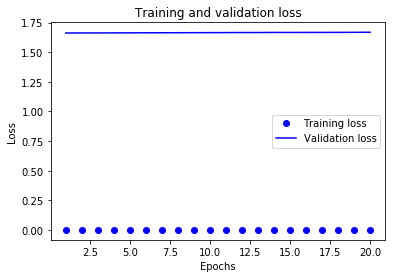

In [71]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

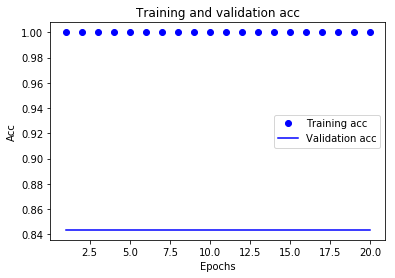

In [72]:
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Validation

In [73]:
val_predict = model.predict(validate_data_features)
val_predict = categorical_probas_to_classes(val_predict)

In [74]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_val, val_predict, target_names=target_names))

             precision    recall  f1-score   support

          0       0.17      0.17      0.17      1231
          1       0.19      0.18      0.19      1293

avg / total       0.18      0.18      0.18      2524



# Prediction

In [31]:
df_test = pd.read_csv("data/workshop_test.csv")

In [75]:
df_test['cleaned_text'] = df_test.apply (lambda row: text_to_words(row.review), axis=1)
test_data_features = vectorizer.transform(df_test['cleaned_text'].values.astype('U'))
test_data_features = test_data_features.toarray()

In [76]:
# Generating predictions for new data
prediction = model.predict(test_data_features)
print prediction

[[  3.28658445e-17]
 [  2.41550397e-16]
 [  7.58526742e-01]
 ..., 
 [  7.06171567e-17]
 [  8.42025775e-18]
 [  0.00000000e+00]]


In [77]:
def categorical_probas_to_classes(p):
    res = []
    for i in p:
        if i[0] > 0.5:
            res.append(0)
        else:
            res.append(1)
    return res
#     return np.argmax(p, axis=1)

In [78]:
actual_prediction = categorical_probas_to_classes(prediction)

In [ ]:
# actual_prediction

# Recurrent Neural Network

In [36]:
from keras.preprocessing import sequence

In [79]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

In [80]:
max_features = 5000

In [81]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [84]:
history = model.fit(train_data_features, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 8074 samples, validate on 2019 samples
Epoch 1/10
8074/8074 [==============================] - 83s 10ms/step - loss: 0.7032 - acc: 0.5005 - val_loss: 0.7162 - val_acc: 0.5102
Epoch 2/10
8074/8074 [==============================] - 220s 27ms/step - loss: 0.7003 - acc: 0.5123 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 3/10
8074/8074 [==============================] - 196s 24ms/step - loss: 0.6928 - acc: 0.5095 - val_loss: 0.6912 - val_acc: 0.5206
Epoch 4/10
8074/8074 [==============================] - 132s 16ms/step - loss: 0.6906 - acc: 0.5255 - val_loss: 0.6882 - val_acc: 0.5468
Epoch 5/10
8074/8074 [==============================] - 136s 17ms/step - loss: 0.6874 - acc: 0.5407 - val_loss: 0.6882 - val_acc: 0.5364
Epoch 6/10
8074/8074 [==============================] - 133s 17ms/step - loss: 0.6877 - acc: 0.5379 - val_loss: 0.6860 - val_acc: 0.5364
Epoch 7/10
8074/8074 [==============================] - 95s 12ms/step - loss: 0.6848 - acc: 0.5530 - val_loss: 0.6880 - val_acc: 0.

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping = EarlyStopping(patience=1, verbose=1)
checkpointer = ModelCheckpoint(
    filepath='model-weights' + "-" + "{epoch:02d}-" + str(
        time.time()) + ".hdf5",
    verbose=2, save_best_only=True)